In [1]:
import random
import time
import json

class Player:
    def __init__(self, name, value, extra = "agent"):
        self.name = name
        self.value = value # defines whether he chooses "X" or "O"
        self.state_count = []
        self.epsilon = 1
        self.gamma = 1
        self.alpha = 0.1
        self.curr_state = "         "
        self.action = 0
        self.Q = {}
        self.no_of_episodes = 0
        self.extra=extra
        self.history = []
        
    def Action(self, values):
        print(self.name,"now it's your turn to play:",end="")
        if (self.extra == "agent"):
            action = self.RlAgent(values)
        else:
            self.curr_state = "".join(values)
            possible_actions = []
            for i in range(len(values)):
                if values[i]==" ":
                    possible_actions.append(i)
            action = int(input())
            while(action not in possible_actions):
                print("Huh!!, it seems you have choosen a wrong action!")
                action = int(input())
        return int(action)
    
    def RlAgent(self, values):
        
        self.curr_state = "".join(values)
        possible_actions = []
        for i in range(len(values)):
            if values[i]==" ":
                possible_actions.append(i)
        if self.curr_state not in self.Q.keys():
            self.Q[self.curr_state] = {}
            for i in possible_actions:
                self.Q[self.curr_state][str(i)] = 0
                
        do = random.choices(["exploit", "explore"],weights=[1-self.epsilon, self.epsilon])[0]
        print(do)
        print(self.name,"can choose any of this states:", possible_actions)
        if (do=="explore"):
            action = random.choice(possible_actions)
        else: #exploit
            max_value = max(self.Q[self.curr_state].values())
            for key, value in self.Q[self.curr_state].items():
                if value == max_value:
                    action = key
                    break
        self.action = action
        return action
    
    def next_state_after_action(self, next_state, reward=0):
        if (self.extra == "agent"):
            if (next_state.count(' ') == 8):
                pass
            else:
                state = self.curr_state
                action = self.action
                next_state = "".join(next_state)
                if next_state not in self.Q.keys():
                    self.Q[next_state] = {}
                    for i in range(len(next_state)):
                        if (next_state[i] == " "):
                            self.Q[next_state][str(i)] = 0
                if (next_state.count(" ") == 0):
                    self.history.append([(self.curr_state, action), reward])
                else:
                    self.history.append([(self.curr_state, action), reward + self.gamma*max(self.Q[next_state].values())])
                self.curr_state = next_state
            
    def endgame(self, values, extra = ''):
        if (self.extra == "agent"):
            self.no_of_episodes+=1
            if (self.no_of_episodes<=100000):
                pass
            elif (self.no_of_episodes<=200000):
                self.epsilon -= 0.000001
            elif (self.epsilon>=0):
                self.epsilon -= 0.0000015

            if (extra == self.value):
                reward = 1
                self.history.pop()
                self.Q[self.curr_state][str(self.action)] = self.alpha*reward
            for i in self.history:
                (state,action)=i[0]
                Gt=i[1]
                self.Q[state][str(action)]+=(self.alpha)*(Gt-self.Q[state][str(action)])

        self.curr_state = "         "
        self.history = []

In [2]:
class Environment:
    def __init__(self):
        self.player1 = 'O'
        self.player2 = 'X'
        self.values = [" "," "," "," "," "," "," "," "," "]
        self.e = 0 # defines the end of game
        self.extra = 'T'
        
    def display_board(self):
        value = self.values
        print()
        print("",value[0],"|",value[1],"|",value[2],"")
#         print("___|___|___")
        print("",value[3],"|",value[4],"|",value[5],"")
#         print("___|___|___")
        print("",value[6],"|",value[7],"|",value[8],"")
        print()
        
    def game(self, player1, player2):
        counter=0
        
        self.values = [" "," "," "," "," "," "," "," "," "]
        self.e = 0 # defines the end of game
        
        print("***************Game Begins!!***************")
        print(player1.name,"has choosen",player1.value)
        print(player2.name,"has choosen",player2.value)
        turn = 0
        action = 0
        while(not self.e and counter<9):
            counter+=1
            if (turn==0):
                action = player1.Action(self.values)
                self.values[action]=player1.value
                self.stateAfterAction(action, player1)
                if (self.e):
                    player2.next_state_after_action(self.values, -1)
                else:
                    player2.next_state_after_action(self.values)
                turn=1
            else:
                action = player2.Action(self.values)
                self.values[action]=player2.value
                self.stateAfterAction(action, player2)
                if (self.e):
                    player1.next_state_after_action(self.values, -1)
                else:
                    player1.next_state_after_action(self.values)
                turn=0
            self.display_board()
        if (counter==9 and not self.e):
            player1.endgame(self.values, self.extra)
            player2.endgame(self.values, self.extra)
            print("***************Game Tie!!***************")
            print("huh!!, it seems no one wins")
            print("***************Game Ends!!***************")
        else:
            player1.endgame(self.values, self.extra)
            player2.endgame(self.values, self.extra)
    def stateAfterAction(self, action, player):
        matrix = [
            [[1,2],[3,6],[4,8]],
            [[0,2],[4,7]],
            [[0,1],[5,8],[4,6]],
            [[0,6],[4,5]],
            [[3,5],[1,7],[0,8],[2,6]],
            [[3,4],[2,8]],
            [[0,3],[7,8],[2,4]],
            [[6,8],[1,4]],
            [[6,7],[2,5],[0,4]]
        ]
        value = player.value
        if (value=="O"):
            checkConditons = matrix[action]
            func = lambda x: self.values[x]=="O"
            funct = lambda x: all(list(map(func,x))) 
            isWin = any(list(map(funct, checkConditons)))
            if(isWin):
                self.e = 1
                self.extra = value
                print("***************",player.name,"wins!!***************")
                print("***************Game Ends!!***************")
        else:
            checkConditons = matrix[action]
            func = lambda x: self.values[x]=="X"
            funct = lambda x: all(list(map(func,x))) 
            isWin = any(list(map(funct, checkConditons)))
            if(isWin):
                self.e = 1
                self.extra = value
                print("***************",player.name,"wins!!***************")
                print("***************Game Ends!!***************")

In [3]:
player1 = Player("Aj", "O")
player2 = Player("Dj", "X")
environment = Environment()

In [4]:
file1 = open("player1.json",'r')
player1.Q = json.load(file1)
file1.close()
file2 = open("player2.json",'r')
player2.Q = json.load(file2)
file2.close()

In [50]:
for i in range(400000):
    environment.game(player1, player2)
    environment.game(player2, player1)
#     for key, value in player1.Q['         '].items():
#         output[int(key)].append(value)

In [5]:
player1.Q

{'         ': {'0': 0.0999999999982863,
  '1': 0.09999999649607029,
  '2': 0.0999999982136987,
  '3': 0.099999626331348,
  '4': 0.09999999999992495,
  '5': 0.09999999998240496,
  '6': 0.0999999999999999,
  '7': 0.09999999926877703,
  '8': 0.09999928673018257},
 'XO       ': {'2': -0.48896671835684086,
  '3': 0.09700644711657551,
  '4': 0.09999999999999967,
  '5': -0.6332961750087036,
  '6': 0.09952042008623153,
  '7': -0.4533173691255549,
  '8': 0.09007848514022856},
 'XOO X    ': {'3': -0.890144674396097,
  '5': -0.9839937162969121,
  '6': -0.9649670320835195,
  '7': -0.9898121979684344,
  '8': 0.0999999999999996},
 'XOOOX X  ': {'5': -0.9282102012308148,
  '7': -0.7016362545771131,
  '8': 0.09903022627021248},
 'XOOOX XOX': {'5': 0},
 '     X   ': {'0': -0.032423495468263355,
  '1': -0.8478115674612029,
  '2': 0.0051939890940458835,
  '3': 0.0008932173878241085,
  '4': 0.0008472227007492602,
  '6': 0.0008625923101843413,
  '7': -0.8022043826400502,
  '8': 0.000825926663809962},
 ' X 

In [6]:
player2.Q

{' O       ': {'0': 0.0014638401646108047,
  '2': 0.002045924644357582,
  '3': -0.02400366169075059,
  '4': 0.00143045985771816,
  '5': -0.6141743977200362,
  '6': -0.6889136790946143,
  '7': 0.0014935397214332676,
  '8': -0.6079539384823589},
 'XOO      ': {'3': 0.07447019467481203,
  '4': 0.04829260656315428,
  '5': -0.28129159026229605,
  '6': 0.08898112752685755,
  '7': 0.04067229694747357,
  '8': -0.3345784228597754},
 'XOOOX    ': {'5': 0.02242726504001593,
  '6': 0.02078215086488027,
  '7': 0.01721256857257265,
  '8': 0.1},
 'XOOOX XO ': {'5': 0.0, '8': 0.1},
 '         ': {'0': 0.0999999997996012,
  '1': 0.09999999923935173,
  '2': 0.09999999695335669,
  '3': 0.09999987198451271,
  '4': 0.0999999999999999,
  '5': 0.09999999998156733,
  '6': 0.09999999620562706,
  '7': 0.09999752530489434,
  '8': 0.09999999999324197},
 '     XO  ': {'0': 0.08460019551256429,
  '1': -0.432451443201107,
  '2': -0.4095943378221046,
  '3': -0.5160276152727555,
  '4': 0.0999999999999651,
  '7': -0.44

In [7]:
player1.epsilon, player1.no_of_episodes, len(player1.Q), len(player2.Q)

(1, 0, 5478, 5478)

In [54]:
file1 = open("player1.json",'w')
file2 = open("player2.json","w")
json.dump(player1.Q, file1)
json.dump(player2.Q, file2)
file1.close()
file2.close()

In [14]:
import matplotlib.pyplot as plt

C:\Users\adityajain\.dist\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


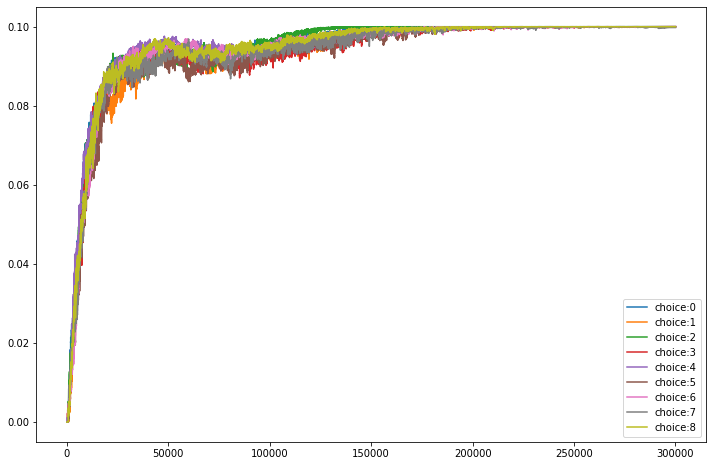

In [15]:
plt.figure(figsize=(12,8))
plt.plot(output[0], label="choice:0")
plt.plot(output[1], label="choice:1")
plt.plot(output[2], label="choice:2")
plt.plot(output[3], label="choice:3")
plt.plot(output[4], label="choice:4")
plt.plot(output[5], label="choice:5")
plt.plot(output[6], label="choice:6")
plt.plot(output[7], label="choice:7")
plt.plot(output[8], label="choice:8")
plt.legend()
plt.show()

# testing of model

In [65]:
player4 = Player("Aj", "X")
player4.Q = q2
environment = Environment()
player4.epsilon=0
# player2.epsilon=0

In [62]:
player1.epsilon=0
player2.epsilon=0

In [66]:
player3 = Player('User', 'O', "user")
environment.game(player2,player3)

***************Game Begins!!***************
Dj has choosen X
User has choosen O
Dj now it's your turn to play:exploit
Dj can choose any of this states: [0, 1, 2, 3, 4, 5, 6, 7, 8]

   |   |   
   | X |   
   |   |   

User now it's your turn to play:0

 O |   |   
   | X |   
   |   |   

Dj now it's your turn to play:exploit
Dj can choose any of this states: [1, 2, 3, 5, 6, 7, 8]

 O | X |   
   | X |   
   |   |   

User now it's your turn to play:7

 O | X |   
   | X |   
   | O |   

Dj now it's your turn to play:exploit
Dj can choose any of this states: [2, 3, 5, 6, 8]

 O | X |   
   | X |   
 X | O |   

User now it's your turn to play:2

 O | X | O 
   | X |   
 X | O |   

Dj now it's your turn to play:exploit
Dj can choose any of this states: [3, 5, 8]

 O | X | O 
 X | X |   
 X | O |   

User now it's your turn to play:1
Huh!!, it seems you have choosen a wrong action!
8

 O | X | O 
 X | X |   
 X | O | O 

Dj now it's your turn to play:exploit
Dj can choose any of this s

In [57]:
import json
file1 = open("player1.json",'r')
q1 = json.load(file1)
file1.close()
file2 = open("player2.json",'r')
q2 = json.load(file2)
file2.close()

In [58]:
q2.update(q1)

In [59]:
len(q2)

8533